# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）

https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定

In [1]:
import warnings
warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from jaqs_fxdayu.data.hf_dataview import HFDataView

path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180601000000}
Time_dict = ds.bar_reader(path,props)
data1H = Time_dict.set_index('datetime')
dv1H = HFDataView()
dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


4.1 AROON指标

AROON技术指标是通过计算自价格达到近期最高值和最低值以来所经过的期间数

公式为：

Aroon(上升)=[(计算期天数-最高价后的天数)/计算期天数]*100

Aroon(下降)=[(计算期天数-最低价后的天数)/计算期天数]*100

思考：上升线和下降线分别与股价的关系，以及两者之间的关系

In [2]:
AROONUP = dv1H.add_formula('AROONUP', "(Ts_Argmax(high,14)/14*100)", add_data = True)
AROONDOWN = dv1H.add_formula('AROONDOWN', "(Ts_Argmin(high,14)/14*100)", add_data = True)

In [3]:
AROONUP = dv1H.get_ts('AROONUP', date_type='datetime')
AROONDOWN = dv1H.get_ts('AROONDOWN', date_type='datetime')

In [4]:
import matplotlib.pyplot as plt
def Plot(dv, indicator1, indicator2, chart_name, n):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[-n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(indicator1.iloc[-n:], color = 'r')
    ax1.plot(indicator2.iloc[-n:],color = 'b')
    plt.show()

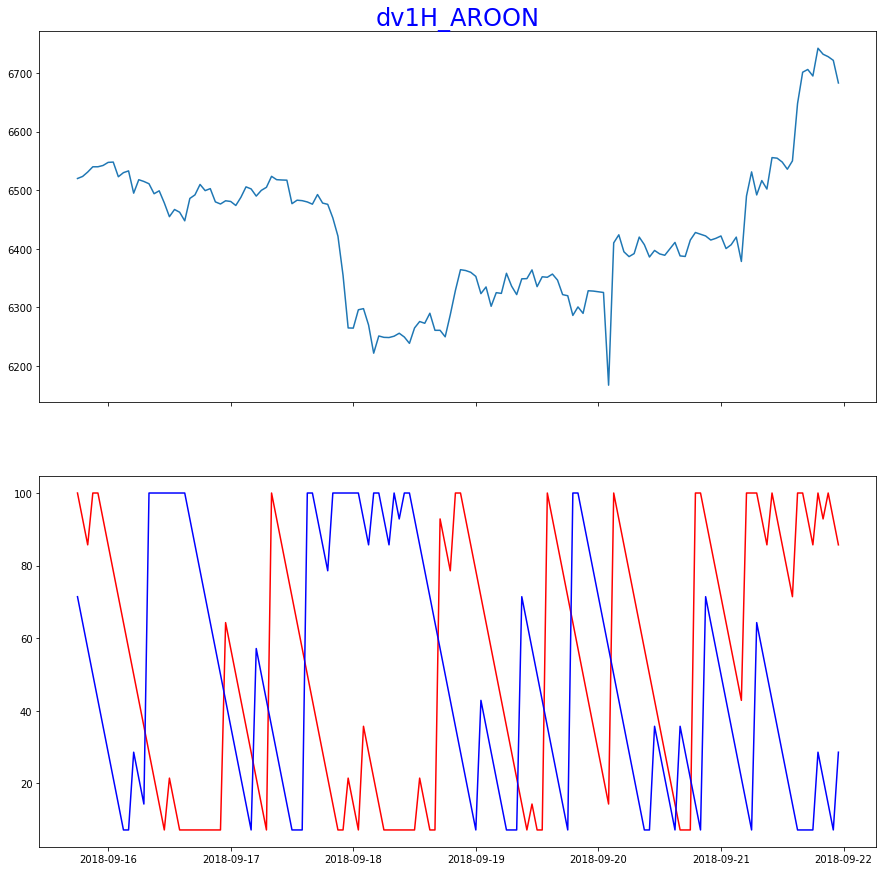

In [5]:
Plot(dv1H, AROONUP, AROONDOWN, chart_name='dv1H_AROON', n=150)

现象：

在股价上升阶段和下跌阶段，通过研究红色UP线和蓝色DOWN线所处位置的关系，可以比较明显地从上图可以发现这些现象：

当Aroon Up愈接近100时，呈上升趋势；当Aroon Down愈接近100时，呈下降趋势；当Aroon Up越高而Aroon Down越低时，具有强劲的上升趋势。 

同样，当Aroon Down越高而Aroon Up越低时，具有强烈的下降趋势。在交叉点， 当Aroon Down上穿过Aroon Up时，上升趋势减弱，反之亦然。

4.2 CMO指标

CMO - Chande Momentum Oscillator 钱德动量摆动指标

钱德动量指标在计算公式的分子中采用上涨日和下跌日的数据

计算公式：

CMO=（Su－Sd）*100/（Su+Sd） 

其中：Su是今日收盘价与昨日收盘价（上涨日）差值加总。若当日下跌，则增加值为0；

Sd是今日收盘价与做日收盘价（下跌日）差值的绝对值加总。若当日上涨，则增加值为0。

思考：股价与CMO线之间的关系，以及CMO长短线之间的关系。

In [6]:
CMO_long = dv1H.add_formula('CMO_long', "Ta('CMO',0,0,0,0,close,0,14)", add_data = True)
CMO_short = dv1H.add_formula('CMO_short', "Ta('CMO',0,0,0,0,close,0,6)", add_data = True)

In [7]:
CMO_long = dv1H.get_ts('CMO_long', date_type='datetime')
CMO_short = dv1H.get_ts('CMO_short', date_type='datetime')

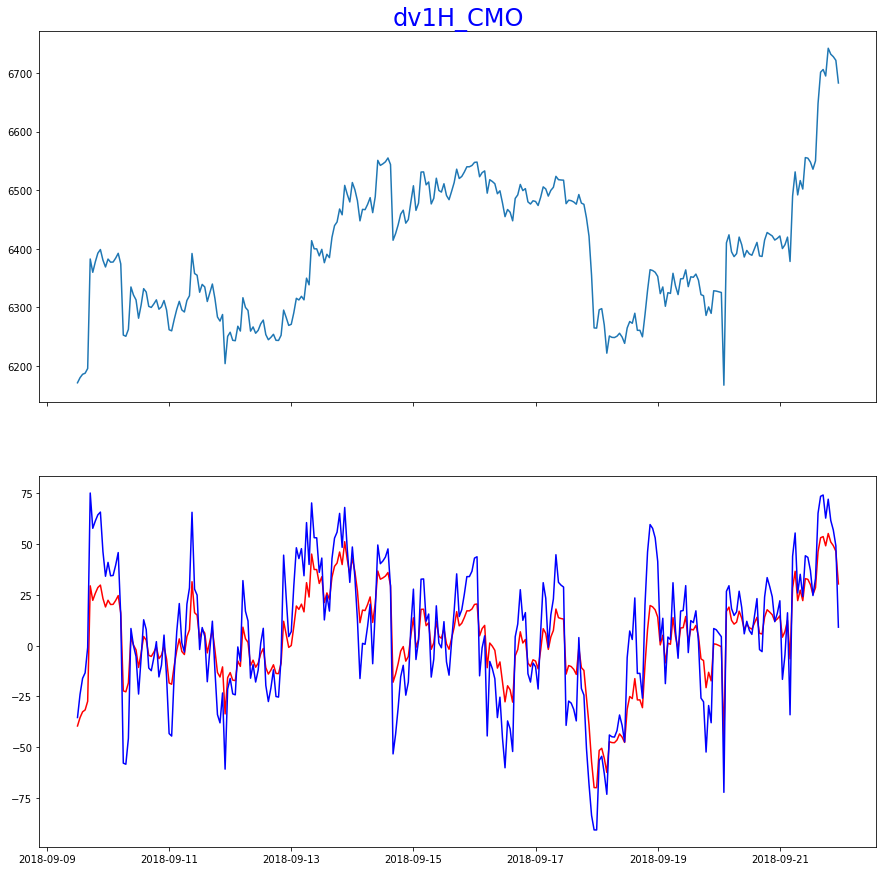

In [8]:
Plot(dv1H, CMO_long, CMO_short, chart_name='dv1H_CMO', n=300)

现象：

CMO质保取值介于-100到100之间，上图中红色线为CMO短期线，蓝色线为CMO长期线

可以发现：CMO线随着收盘价的上升而上升，随着收盘价的下跌而下跌，

当股价达到局部的极值点时CMO线也达到了局部的极值点

当短期线上穿过长期线时，股价的下降趋势加强，两线距离越远下降趋势越强；

当短期线下穿过长期线时，股价的上升趋势加强，两线距离越远上升趋势越强。


# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

5.1 AROON指标信号

In [9]:
import matplotlib.pyplot as plt
def AROON_Plot(dv, indicator1, indicator2, chart_name, n):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[-n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    
    ax1.plot(indicator1.iloc[-n:], color = 'r')
    ax1.plot(indicator2.iloc[-n:],color = 'b')
    begin = indicator1.index[-n]
    end = indicator1.index[-1]
    ax1.hlines(70, begin, end, alpha=0.5, linestyle='-.')
    ax1.hlines(30, begin, end, alpha=0.5, linestyle='-.')
    plt.show()

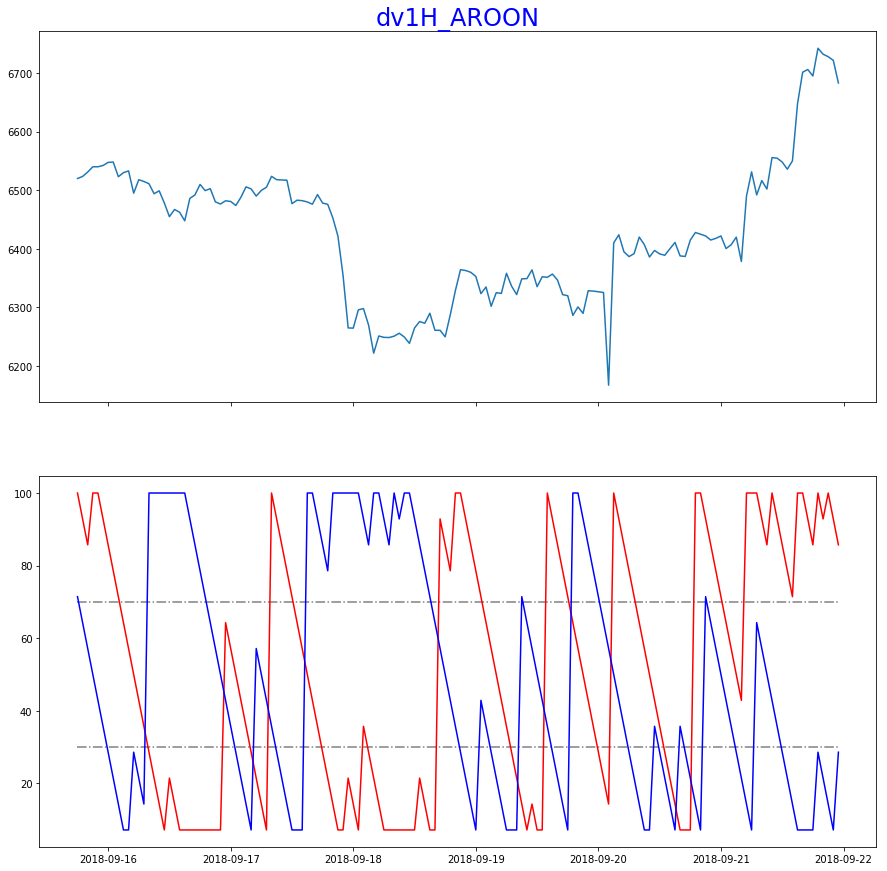

In [10]:
AROON_Plot(dv1H, AROONUP, AROONDOWN, chart_name='dv1H_AROON', n=150)

由于AROON的值处于0到100之间，大致画出三等分的水平虚线，上图中，红线为UP线，蓝线为DOWN线，水平虚线取值为30、70，可以发现：
    
当Up线停留在70到100之间时，则表明呈上升趋势。 当Down线停留在70到100之间时，呈下降趋势。 当Up线高于70而Down线低于30时，表明强劲的上升趋势。 

同样，当Down线高于70而Up线低于30时，表明强烈的下降趋势。考虑交叉点，当Down线上越过Up线时，上升趋势减弱，当Up线上越过Down线时，上升趋势增强。

因此，可以提出进场信号假设：
    
1、当UP线达到100时为进场信号；2、当UP线高于70时为进场信号；3、当UP线高于70而DOWN线低于30时为进场信号；4、当UP线上穿过DOWN线为进场信号；

相对应的，出场信号为：
    
1、当DOWN线达到100时为出场信号；2、当DOWN线高于70时为出场信号；3、当DOWN线高于70而UP线低于30时为出场信号；4、当DOWN线上穿过UP为出场信号；

5.2 CMO指标

In [11]:
def CMO_Plot(dv, indicator1, indicator2, chart_name, n):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[-n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    
    ax1.plot(indicator1.iloc[-n:], color = 'r')
    ax1.plot(indicator2.iloc[-n:],color = 'b')
    begin = indicator1.index[-n]
    end = indicator1.index[-1]
    ax1.hlines(50, begin, end, alpha=0.5, linestyle='-.')
    ax1.hlines(0, begin, end, alpha=0.5, linestyle='-.')
    ax1.hlines(-50, begin, end, alpha=0.5, linestyle='-.')
    plt.show()

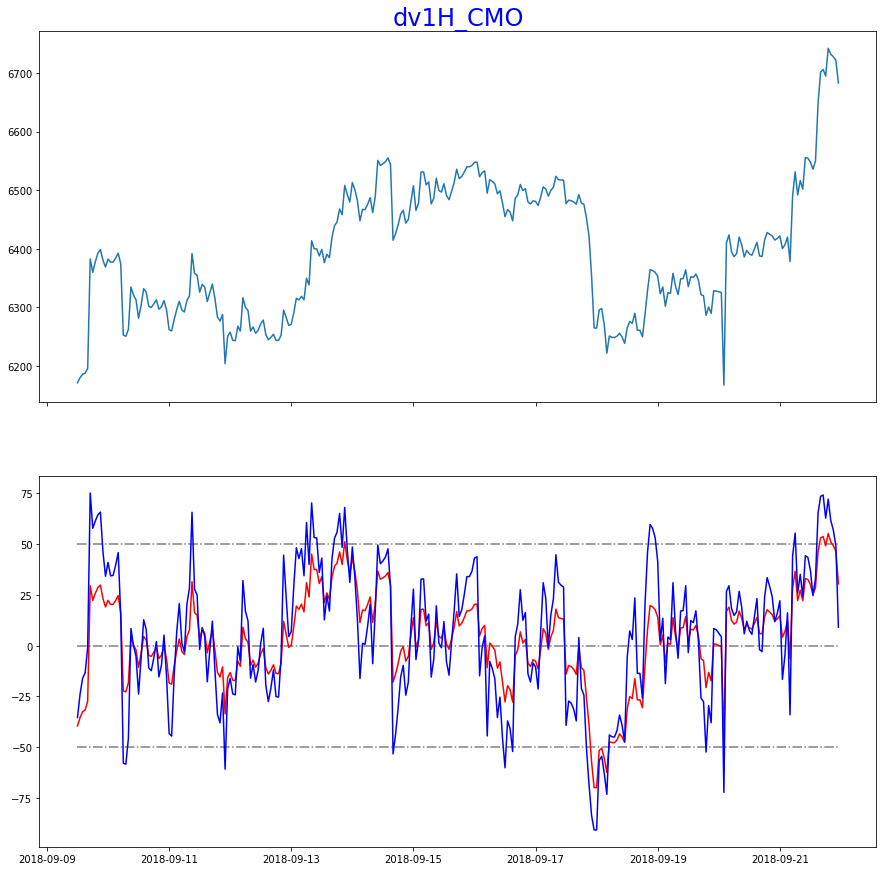

In [12]:
CMO_Plot(dv1H, CMO_long, CMO_short, chart_name='dv1H_CMO', n=300)

由于CMO的值处于-100到100之间，大致画出四等分的水平虚线，上图中，红线为短线，蓝线为长线，水平虚线取值为-50、0、50，可以发现：

1、当CMO指标向上突破+50，出现超买，当CMO指标向下突破-50时，出现超卖，股价出现反转；

2、当短线向上突破长线，短期内超买，当短线向下突破长线，短期内超卖，股价出现反转。

因此，提出进场信号：

1、当本指标下穿-50水平时出现超买，是进场信号；

2、当短线下穿过长线时为进场信号。

出场信号：

1、上穿+50水平是卖出信号；

2、当短线上穿过长线时为出场信号。

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来

In [13]:
from jaqs_fxdayu.research import TimingDigger
def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

AROON指标绩效分析, CMO指标绩效分析方法类似

In [14]:
# 进场信号
long = dv1H.add_formula("longAROON","If(AROONUP == 100 || (AROONUP >= 70 && AROONDOWN <= 30 )|| AROONUP >= 70 || ((AROONUP > AROONDOWN) && (Delay(AROONUP,1)<=Delay(AROONDOWN,1))),2,0)", add_data=True)
short = dv1H.add_formula("shortAROON","If(AROONDOWN == 100 || (AROONDOWN >= 70 && AROONUP <= 30 )|| AROONDOWN >= 70 || ((AROONUP < AROONDOWN) && (Delay(AROONUP,1)>=Delay(AROONDOWN,1))),-2,0)", add_data=True)
# 出场信号
close_long = dv1H.add_formula("closeLongAROON","If(shortAROON==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortAROON","If(longAROON==2,-1,0)", add_data=True)

In [15]:
tdAROON = TimingDigger(output_folder=".", output_format='pdf',signal_name='AROON')
TimingSignal(tdAROON, dv1H,'longAROON','shortAROON','closeLongAROON','closeShortAROON', 100, 0.15, 0.7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%


In [16]:
#(sig_type="long")
tdAROON.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               4.914  -9.637   -0.157
p-value              0.000   0.000    0.876
mean                 0.015  -0.010   -0.000
std                  0.021   0.009    0.019
info_ratio           0.733  -1.169   -0.015
skewness             2.203  -1.619    1.937
kurtosis             5.151   4.400    7.039
pct5                 0.001  -0.025   -0.023
pct25                0.002  -0.015   -0.011
pct50                0.006  -0.009   -0.002
pct75                0.018  -0.003    0.004
pct95                0.048  -0.001    0.038
occurance           46.000  69.000  115.000
win_ratio              NaN     NaN    0.400
win_mean/loss_mean     NaN     NaN    1.432


In [17]:
#(sig_type="short")
tdAROON.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               5.108  -8.531    0.296
p-value              0.000   0.000    0.767
mean                 0.019  -0.012    0.001
std                  0.025   0.011    0.023
info_ratio           0.753  -1.035    0.028
skewness             1.750  -1.666    1.677
kurtosis             2.614   2.735    4.970
pct5                 0.001  -0.030   -0.026
pct25                0.003  -0.016   -0.009
pct50                0.005  -0.008   -0.003
pct75                0.032  -0.003    0.003
pct95                0.075  -0.001    0.041
occurance           47.000  69.000  116.000
win_ratio              NaN     NaN    0.405
win_mean/loss_mean     NaN     NaN    1.605


In [18]:
#(sig_type="long_short")
tdAROON.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat               7.080  -12.704    0.130
p-value              0.000    0.000    0.897
mean                 0.017   -0.011    0.000
std                  0.023    0.010    0.021
info_ratio           0.738   -1.085    0.009
skewness             1.963   -1.711    1.805
kurtosis             3.693    3.630    5.958
pct5                 0.001   -0.027   -0.025
pct25                0.003   -0.016   -0.010
pct50                0.006   -0.008   -0.003
pct75                0.026   -0.003    0.003
pct95                0.068   -0.001    0.040
occurance           93.000  138.000  231.000
win_ratio              NaN      NaN    0.403
win_mean/loss_mean     NaN      NaN    1.525
